In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


5


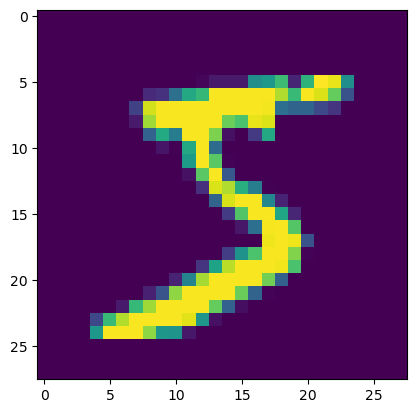

In [41]:
plt.imshow(x_train[0])
print(y_train[0])

In [40]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(scale= 1./255, input_shape = (28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',  kernel_regularizer=  'L2'),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = 'L2'),
    tf.keras.layers.Dense(10)
])

In [74]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               100480    
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [86]:
model.fit(x_train, y_train, batch_size=64, epochs= 20, validation_split=0.1)

Epoch 1/20
844/844 [==============================] - 4s 4ms/step - loss: 0.9799 - sparse_categorical_accuracy: 0.8820 - val_loss: 0.5311 - val_sparse_categorical_accuracy: 0.9385
Epoch 2/20
844/844 [==============================] - 3s 4ms/step - loss: 0.5487 - sparse_categorical_accuracy: 0.9193 - val_loss: 0.4585 - val_sparse_categorical_accuracy: 0.9430
Epoch 3/20
844/844 [==============================] - 3s 4ms/step - loss: 0.4890 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.4110 - val_sparse_categorical_accuracy: 0.9548
Epoch 4/20
844/844 [==============================] - 3s 4ms/step - loss: 0.4484 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.3876 - val_sparse_categorical_accuracy: 0.9552
Epoch 5/20
844/844 [==============================] - 3s 4ms/step - loss: 0.4186 - sparse_categorical_accuracy: 0.9391 - val_loss: 0.3775 - val_sparse_categorical_accuracy: 0.9485
Epoch 6/20
844/844 [==============================] - 3s 4ms/step - loss: 0.3957 - sparse_categorica

In [87]:
model.save('2nrmodel.h5')


In [88]:
test =  model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2557 - sparse_categorical_accuracy: 0.9665


In [79]:
test

[0.11422199755907059, 0.9782999753952026]

In [92]:
n_model = tf.keras.models.load_model('../server/model/model.h5')

In [94]:
prediction = n_model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [95]:
prediction.shape

(10000, 10)

In [96]:
import numpy as np
prediction_arg = np.argmax(prediction,axis=1)

KeyboardInterrupt: 

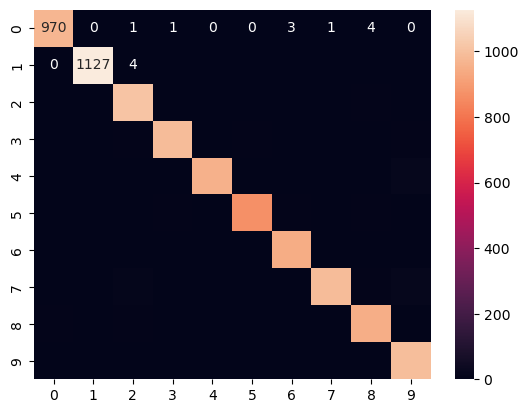

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, prediction_arg, ), annot=True, fmt='.0f')